# Tutorial 4
## Waifu2x

In [1]:
!pip3 install --user requests

Cleaning up...


In [8]:
import requests
r = requests.get("https://marcan.st/transf/scale2.0x_model.json")
with open('scale2.0x_model.json', 'w') as f:
    f.write(r.text)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# waifu2x.py by @marcan42 based on https://github.com/nagadomi/waifu2x
# MIT license, see https://github.com/nagadomi/waifu2x/blob/master/LICENSE
import json, sys, numpy as np
from scipy import misc, signal
from PIL import Image

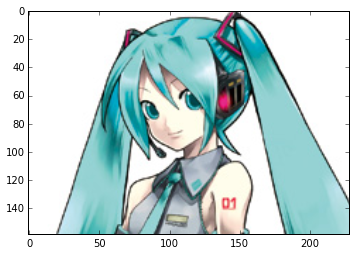

In [14]:
modelpath = "scale2.0x_model.json"
model = json.load(open(modelpath))
im1 = Image.open("miku_small.png")
imshow(im1)

In [15]:
im = im1.convert("YCbCr")
im = misc.fromimage(im.resize((2*im.size[0], 2*im.size[1]), resample=Image.NEAREST)).astype("float32")
planes = [np.pad(im[:,:,0], len(model), "edge") / 255.0]
count = sum(step["nInputPlane"] * step["nOutputPlane"] for step in model)
progress = 0
for step in model:
    assert step["nInputPlane"] == len(planes)
    assert step["nOutputPlane"] == len(step["weight"]) == len(step["bias"])
    o_planes = []
    for bias, weights in zip(step["bias"], step["weight"]):
        partial = None
        for ip, kernel in zip(planes, weights):
            p = signal.convolve2d(ip, np.float32(kernel), "valid")
            if partial is None:
                partial = p
            else:
                partial += p
            progress += 1
            sys.stderr.write("\r%.1f%%..." % (100 * progress / float(count)))
        partial += np.float32(bias)
        o_planes.append(partial)
    planes = [np.maximum(p, 0) + 0.1 * np.minimum(p, 0) for p in o_planes]

im[:,:,0] = np.clip(planes[0], 0, 1) * 255
misc.toimage(im, mode="YCbCr").convert("RGB")
sys.stderr.write("Done\n")

100.0%...Done


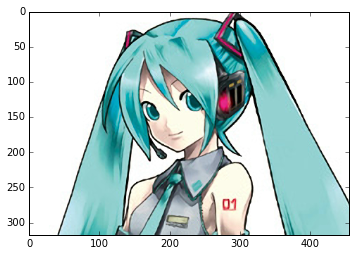

In [16]:
im2 = misc.toimage(im, mode="YCbCr").convert("RGB")
imshow(im2)

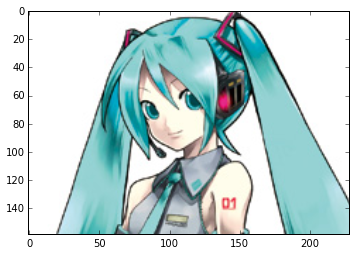

In [18]:
imshow(im1)